In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mat
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [23]:
df=pd.read_csv('Admission_Predict_Ver1.1.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


# 1

In [24]:
dup=df.duplicated()
dup

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool

In [25]:
df=df[~dup]
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


# 2

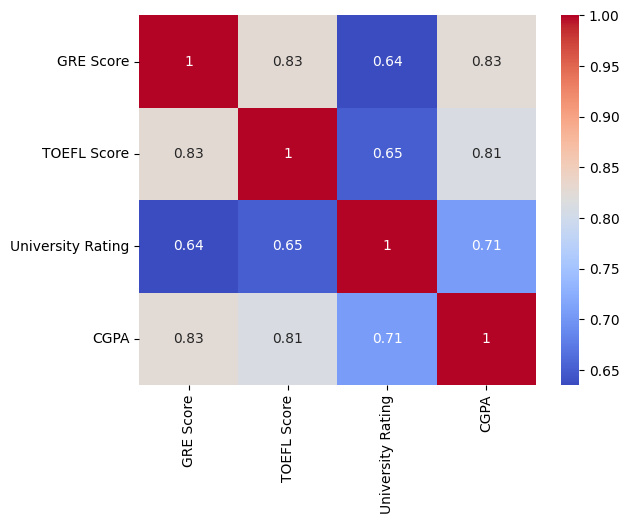

In [26]:
cols=['GRE Score','TOEFL Score','University Rating','CGPA']
corr_m=df[cols].corr()
sns.heatmap(corr_m,annot=True,cmap='coolwarm')
mat.show()

# 3

In [27]:
df_n=df.isna().sum()
df_n

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [28]:
df=df.fillna(df.mean())
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


# 4

In [29]:
print(df.head())

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


In [37]:
from sklearn.metrics import mean_squared_error,accuracy_score
target_column = 'Chance of Admit '
feature_column = 'University Rating'
X_train, X_test, y_train, y_test = train_test_split(df[feature_column], df[target_column], test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train.values.reshape(-1, 1), y_train)
y_pred = model.predict(X_test.values.reshape(-1, 1))
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
y_pred

Mean Squared Error: 0.0096325221533954


array([0.79810058, 0.79810058, 0.63150772, 0.71480415, 0.71480415,
       0.79810058, 0.54821128, 0.79810058, 0.71480415, 0.79810058,
       0.71480415, 0.71480415, 0.79810058, 0.88139702, 0.71480415,
       0.63150772, 0.88139702, 0.63150772, 0.63150772, 0.71480415,
       0.63150772, 0.79810058, 0.71480415, 0.71480415, 0.71480415,
       0.71480415, 0.88139702, 0.79810058, 0.63150772, 0.79810058,
       0.71480415, 0.71480415, 0.63150772, 0.79810058, 0.71480415,
       0.71480415, 0.54821128, 0.88139702, 0.71480415, 0.63150772,
       0.79810058, 0.63150772, 0.63150772, 0.79810058, 0.88139702,
       0.63150772, 0.79810058, 0.79810058, 0.79810058, 0.88139702,
       0.88139702, 0.63150772, 0.88139702, 0.54821128, 0.88139702,
       0.71480415, 0.79810058, 0.71480415, 0.71480415, 0.63150772,
       0.71480415, 0.63150772, 0.63150772, 0.88139702, 0.54821128,
       0.63150772, 0.79810058, 0.88139702, 0.71480415, 0.71480415,
       0.63150772, 0.71480415, 0.63150772, 0.63150772, 0.54821

# END